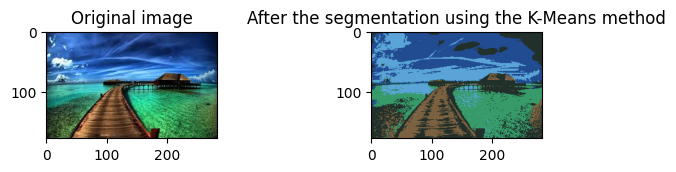

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/cv1.jpg")
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original image')

img2 = img.reshape((-1, 3))
img2 = np.float32(img2)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 5
attempts = 10
ret, label, center = cv2.kmeans(img2, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.title('After the segmentation using the K-Means method')
plt.subplots_adjust(wspace=0.9)


plt.show()


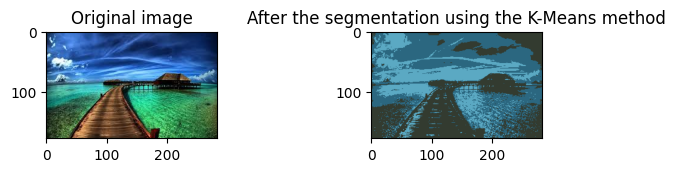

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/cv1.jpg")
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original image')

img2 = img.reshape((-1, 3))
img2 = np.float32(img2)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 3
attempts = 10
ret, label, center = cv2.kmeans(img2, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.title('After the segmentation using the K-Means method')
plt.subplots_adjust(wspace=0.9)


plt.show()


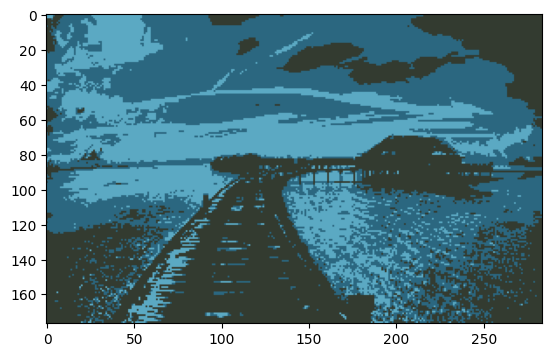

In [ ]:
plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))

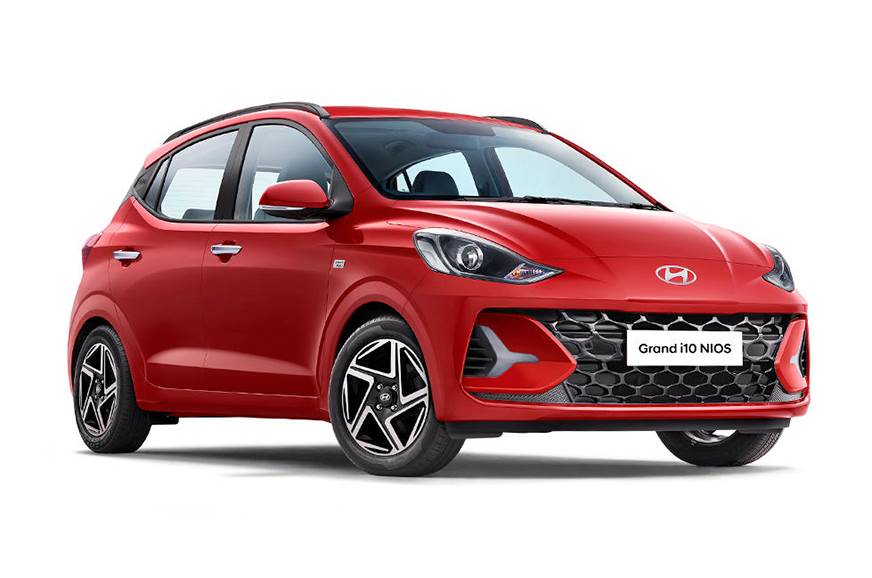

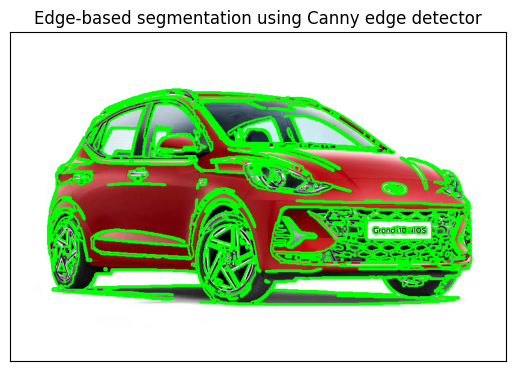

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/Hyundai-Grand-i10-Nios-200120231541.jpg")
cv2_imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 100, 200)

kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(edges, kernel, iterations=1)


ret, thresh = cv2.threshold(dilation, 0, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0,255,0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Edge-based segmentation using Canny edge detector')
plt.xticks([]), plt.yticks([])
plt.show()


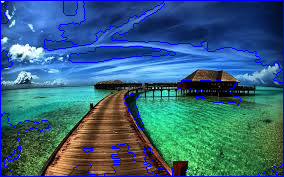

In [ ]:
import cv2
import numpy as np


img = cv2.imread("/content/cv1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, fg = cv2.threshold(dist_transform, 0.1*dist_transform.max(), 255, 0)

fg = np.uint8(fg)
unknown = cv2.subtract(opening, fg)
ret, markers = cv2.connectedComponents(fg)

markers = markers+1
markers[unknown==255] = 0
markers = cv2.watershed(img, markers)
img[markers == -1] = [255,0,0]
cv2_imshow(img)
#cv2_imshow(markers)